In [ ]:
import inspect as ins
import sklearn as sk
import os
import glob
from os import walk

In [ ]:
def basedir(filepath):
    li=filepath.split('/')
    del li[-1]
    bdir='/'.join(li)
    return bdir

In [ ]:
def allrecfiles(dirpath,extfile=None):
    filenames = []
    for dirs , subdir , files in os.walk(dirpath):
        for name in files:
            filename = os.path.join(dirs,name)
            if extfile == None:
                filenames.append(filename)
            else:
                if filename.endswith(extfile):
                    filenames.append(filename)
    return filenames

In [ ]:
def removeext(filename,extfile=None):
    li=filename.split(extfile)
    return li[0]

In [ ]:
def bottompath(filename):
    li=filename.split('/')
    if li[-1] == '':
        return li[-2]
    else:
        return li[-1]

In [ ]:
def dirdepth(dirpath):
    li=dirpath.split('/')
    if li[-1] == '':
        return len(li) - 1
    else:
        return len(li)

In [ ]:
def baseroot(dirpath,dirpath1):
    dep=dirdepth(dirpath)
    arr=dirpath1.split('/')
    new_arr=[]
    for i in range(dep,len(arr)):
        new_arr.append(arr[i])
    return new_arr

In [11]:
baseroot('/usr/local/lib/python3.6/dist-packages/','/usr/local/lib/python3.6/dist-packages/sklearn/multioutput')

['sklearn', 'multioutput']

In [ ]:
def getselmem(obj,pred=None):
    li=[]
    for j in pred:
        li.append(ins.getmembers(obj,j))
    final_list=[]
    for i in li:
        for j in i:
            final_list.append(j)
    return final_list

In [ ]:
def main(allfiles):
    di={}
    for i in allfiles:
        i=removeext(i,'.py')
        li=baseroot('/usr/local/lib/python3.6/dist-packages/',i)
        importstr=('.').join(li)
        str1= 'import ' + importstr 
        str2='di[\'' + importstr + '\']=getselmem(' + importstr +  ',[ins.isfunction,ins.ismethod,ins.isclass])'
        try:
            exec(str1)
            exec(str2)
        except:
            pass
    return di

In [ ]:
allfiles=allrecfiles('/usr/local/lib/python3.6/dist-packages/sklearn/','.py')

In [15]:
t=main(allfiles)
print(t)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


{'sklearn.grid_search': [('_check_param_grid', <function _check_param_grid at 0x7f49f5b3ea60>), ('_fit_and_score', <function _fit_and_score at 0x7f49f5b3aa60>), ('_num_samples', <function _num_samples at 0x7f49f6736d90>), ('abstractmethod', <function abstractmethod at 0x7f4a18be3400>), ('check_cv', <function check_cv at 0x7f49f5b3ad08>), ('check_random_state', <function check_random_state at 0x7f49f67392f0>), ('check_scoring', <function check_scoring at 0x7f49f5ddcc80>), ('clone', <function clone at 0x7f49f6bbab70>), ('delayed', <function delayed at 0x7f49f6736268>), ('fit_grid_point', <function fit_grid_point at 0x7f49f5b3e620>), ('if_delegate_has_method', <function if_delegate_has_method at 0x7f49f5b62950>), ('indexable', <function indexable at 0x7f49f6739048>), ('is_classifier', <function is_classifier at 0x7f49f673b620>), ('namedtuple', <function namedtuple at 0x7f4a18b56158>), ('ABCMeta', <class 'abc.ABCMeta'>), ('BaseEstimator', <class 'sklearn.base.BaseEstimator'>), ('BaseSearch

In [ ]:
class node:
    def __init__(self, key, name=None):
        self.key = key
        self.name = ('Dummy_node' if not name else name)
        
    def __str__(self):
        return self.key
        

In [17]:
import networkx as nx
# from graphviz import Digraph
G = nx.DiGraph()
# G = Digraph()
for i in t.keys():
    #node_num = 0
    G.add_node(i)
    j=t[i]
    for k in j:
        G.add_node(ins.getmodule(k[1]).__name__ + '.' + k[0])
        print(f"node_name={ k[0]}, and type={type(ins.getmodule(k[1]).__name__ + '.' + k[0])}")
        if i == ins.getmodule(k[1]).__name__ :
            G.add_edge(i,ins.getmodule(k[1]).__name__ + '.' + k[0], weight=1)
        else:
            G.add_edge(ins.getmodule(k[1]).__name__ + '.' + k[0],i, weight=1)
    #G = nx.relabel.convert_node_labels_to_integers(G)

node_name=_check_param_grid, and type=<class 'str'>
node_name=_fit_and_score, and type=<class 'str'>
node_name=_num_samples, and type=<class 'str'>
node_name=abstractmethod, and type=<class 'str'>
node_name=check_cv, and type=<class 'str'>
node_name=check_random_state, and type=<class 'str'>
node_name=check_scoring, and type=<class 'str'>
node_name=clone, and type=<class 'str'>
node_name=delayed, and type=<class 'str'>
node_name=fit_grid_point, and type=<class 'str'>
node_name=if_delegate_has_method, and type=<class 'str'>
node_name=indexable, and type=<class 'str'>
node_name=is_classifier, and type=<class 'str'>
node_name=namedtuple, and type=<class 'str'>
node_name=ABCMeta, and type=<class 'str'>
node_name=BaseEstimator, and type=<class 'str'>
node_name=BaseSearchCV, and type=<class 'str'>
node_name=GridSearchCV, and type=<class 'str'>
node_name=Mapping, and type=<class 'str'>
node_name=MetaEstimatorMixin, and type=<class 'str'>
node_name=Parallel, and type=<class 'str'>
node_name=Pa

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def sub_graph(node,G):
    li=[]
    for j in G.predecessors(node):
        li.append(j)
    for j in G.successors(node):
        li.append(j)
    li.append(node)
    return G.subgraph(li)

In [22]:
#plt.subplot(121)
# nx.draw_shell(sub_graph('sklearn.cross_decomposition.pls_',G), with_labels=True, font_weight='bold')
nx.node_link_data(sub_graph('sklearn.cross_decomposition.pls_',G))


{'directed': True,
 'graph': {},
 'links': [{'source': 'sklearn.utils.validation.check_consistent_length',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': 'scipy.sparse.linalg.eigen.arpack.arpack.svds',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': 'sklearn.utils.validation.check_array',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': 'sklearn.utils.validation.check_is_fitted',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': 'sklearn.base.RegressorMixin',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': 'sklearn.utils.extmath.svd_flip',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': 'sklearn.base.TransformerMixin',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': 'sklearn.base.BaseEstimator',
   'target': 'sklearn.cross_decomposition.pls_',
   'weight': 1},
  {'source': '

In [ ]:
# !pip install nxviz

In [ ]:
# type(nx.node_link_data(sub_graph('sklearn.cross_decomposition.pls_',G)))
import json
# json.dump(nx.node_link_data(sub_graph('sklearn.cross_decomposition.pls_',G)))
Gsub=sub_graph('sklearn.cross_decomposition.pls_',G)
for n in Gsub:
    Gsub.nodes[n]['name'] = n
from networkx.readwrite import json_graph
d = json_graph.node_link_data(Gsub)

In [ ]:
from networkx import convert_node_labels_to_integers
Gsub=sub_graph('sklearn.cross_decomposition.pls_',G)
Glab=convert_node_labels_to_integers(Gsub)

In [ ]:
from networkx.readwrite import json_graph
d = json_graph.node_link_data(Glab)

In [36]:
d

{'directed': True,
 'graph': {},
 'links': [{'source': 0, 'target': 17, 'weight': 1},
  {'source': 1, 'target': 17, 'weight': 1},
  {'source': 2, 'target': 17, 'weight': 1},
  {'source': 3, 'target': 17, 'weight': 1},
  {'source': 5, 'target': 17, 'weight': 1},
  {'source': 6, 'target': 17, 'weight': 1},
  {'source': 7, 'target': 17, 'weight': 1},
  {'source': 8, 'target': 17, 'weight': 1},
  {'source': 13, 'target': 17, 'weight': 1},
  {'source': 14, 'target': 17, 'weight': 1},
  {'source': 17, 'target': 12, 'weight': 1},
  {'source': 17, 'target': 9, 'weight': 1},
  {'source': 17, 'target': 11, 'weight': 1},
  {'source': 17, 'target': 15, 'weight': 1},
  {'source': 17, 'target': 10, 'weight': 1},
  {'source': 17, 'target': 16, 'weight': 1},
  {'source': 17, 'target': 4, 'weight': 1},
  {'source': 18, 'target': 17, 'weight': 1},
  {'source': 19, 'target': 17, 'weight': 1}],
 'multigraph': False,
 'nodes': [{'id': 0,
   'name': 'sklearn.utils.validation.check_consistent_length'},
  {'i

In [ ]:
json.dump(d, open('force.json', 'w'))
# !ls
from google.colab import files
files.download('force.json')

{'abc.abstractmethod': array([-212.25208904,  458.96265528]), 'scipy.linalg.decomp_svd.svd': array([466.95672358, 274.109432  ]), 'scipy.sparse.linalg.eigen.arpack.arpack.svds': array([ 467.0216879, -237.7297409]), 'sklearn.cross_decomposition.pls_': array([19.64980664, 20.75182116]), 'sklearn.cross_decomposition.pls_._PLS': array([3264.05694774, 1085.99744188]), 'sklearn.utils.validation.check_is_fitted': array([  15.96980282, -490.0796632 ]), 'sklearn.base.RegressorMixin': array([-236.21740939, -417.33666012]), 'sklearn.utils.validation.check_array': array([515.70257748,  19.85143759]), 'sklearn.cross_decomposition.pls_._svd_cross_product': array([-2534.56160369,    42.28329314]), 'sklearn.base.BaseEstimator': array([-415.40724013, -221.4165141 ]), 'sklearn.cross_decomposition.pls_.PLSRegression': array([-2904.27655653, -1499.36283039]), 'sklearn.cross_decomposition.pls_.PLSSVD': array([ 1399.61973291, -2992.91529481]), 'sklearn.base.TransformerMixin': array([-418.91639049,  298.3179

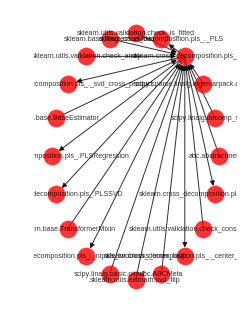

In [22]:
# list(G.predecessors('sklearn.cross_decomposition.pls_'))
s = sub_graph('sklearn.cross_decomposition.pls_',G)
pos = nx.drawing.spring_layout(s, scale=3300)
print(pos)
# print(G.nodes())
# plt.subplot(111)
# nx.draw(s,pos, with_labels=True,node_size = 15, node_color='#A0CBE2')
plt.subplot(122)
nx.draw_shell(s,with_labels=True, alpha=0.8, font_size=7)
plt.show()

# New Section

In [23]:
!pip install bokeh

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()
from bokeh.models.graphs import from_networkx
from bokeh.models import Range1d, Plot
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine

plot = Plot(x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))

# graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
graph = from_networkx(sub_graph('sklearn.cross_decomposition.pls_',G), nx.spring_layout, scale=3, center=(0,0))
plot.renderers.append(graph)


# Blue circles for nodes, and light grey lines for edges
graph.node_renderer.glyph = Circle(size=25, fill_color='#2b83ba')
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.8, line_width=2)

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size=25, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips=None))

show(plot)

Loading BokehJS ...